In [61]:
# scikit-learn pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# general and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from collections import Counter
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler        

# import helper functions
import utils as ut

# set random seed for test reproducibility
np.random.seed(42)

# suppress sklearn convergence warning
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [62]:
# Evaluation Selection Cell
dataset = 'wine'    # nasa or wine

eval_model = 'mlp'  # knn, svc or mlp
dimred = 'pca'
cluster = 'none'

do_grid_cv = False  # perform grid search
time_complexity = True  # check time complexity
loss_opt = False    # evaluate mlp loss curve
imbalance = False   # perform dataset balancing (NOT USED IN REPORT - MARGINAL BENEFITS)

# Load data
path = './datasets/'+dataset+'_cla.csv'
df = pd.read_csv(path)

In [63]:
# Split data into training and testing sets
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train_reg, X_test_reg, y_train_r, y_test_r = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42) # 80/20 split

if dataset == 'wine':
    # re-label targets
    y_train = y_train_r - 3 # normalize between [0 - 5]
    y_test = y_test_r - 3 # normalize between [0 - 5]
else:
    y_train = y_train_r
    y_test = y_test_r

X_train_reg = X_train_reg.astype(np.float32)
X_test_reg = X_test_reg.astype(np.float32)

# standardize training and test dataset
scaler = StandardScaler()
scaler.fit_transform(X_train_reg)
X_tr_scaled = scaler.transform(X_train_reg)
X_te_scaled = scaler.transform(X_test_reg)

print(X_train_reg.shape, y_train.shape)
print(y_train.min())


(914, 11) (914,)
0


In [100]:
import pickle
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

def load_object(filename):
    """Load a Python object from a pickle file."""
    with open(filename, 'rb') as file:
        return pickle.load(file)

# save_object(reduced_sets, 'reduced_dim_sets_nasa.pkl')

def load_train_data(X_tr_scaled, X_te_scaled, dimred, cluster):
    # models_set, X_reduced_set, cluster_sets = load_object('reduced_dim_sets_wine.pkl')
    if dimred == 'pca':

        pca = PCA(n_components=9, random_state=1, svd_solver='full')
        X_train = pca.fit_transform(X_tr_scaled)
        X_test = pca.transform(X_te_scaled)

        if cluster == 'kmeans':
            kmeans = KMeans(n_clusters=2, random_state=1)
            C_train = kmeans.fit_predict(X_tr_scaled)
            C_test = kmeans.predict(X_te_scaled)
            X_train_cluster = np.concatenate((X_train, C_train.reshape(-1,1)), axis=1)
            X_test_cluster = np.concatenate((X_test, C_test.reshape(-1,1)), axis=1)

        elif cluster == 'gmm':
            gmm = GaussianMixture(n_components=4, random_state=1)
            C_train = gmm.fit_predict(X_tr_scaled)
            C_test = gmm.predict(X_te_scaled)
            X_train_cluster = np.concatenate((X_train, C_train.reshape(-1,1)), axis=1)
            X_test_cluster = np.concatenate((X_test, C_test.reshape(-1,1)), axis=1)

    elif dimred == 'ica':

        ica = FastICA(n_components=8, random_state=1)
        X_train = ica.fit_transform(X_tr_scaled)
        X_test = ica.transform(X_te_scaled)

        if cluster == 'kmeans':
            kmeans = KMeans(n_clusters=2, random_state=1)
            C_train = kmeans.fit_predict(X_tr_scaled)
            C_test = kmeans.predict(X_te_scaled)
            X_train_cluster = np.concatenate((X_train, C_train.reshape(-1,1)), axis=1)
            X_test_cluster = np.concatenate((X_test, C_test.reshape(-1,1)), axis=1)

        elif cluster == 'gmm':
            gmm = GaussianMixture(n_components=4, random_state=1)
            C_train = gmm.fit_predict(X_tr_scaled)
            C_test = gmm.predict(X_te_scaled)
            X_train_cluster = np.concatenate((X_train, C_train.reshape(-1,1)), axis=1)
            X_test_cluster = np.concatenate((X_test, C_test.reshape(-1,1)), axis=1)

    elif dimred == 'grp':
        
        grp = GaussianRandomProjection(n_components=9, random_state=1)
        X_train = grp.fit_transform(X_tr_scaled)
        X_test = grp.transform(X_te_scaled)

        if cluster == 'kmeans':
            kmeans = KMeans(n_clusters=2, random_state=1)
            C_train = kmeans.fit_predict(X_tr_scaled)
            C_test = kmeans.predict(X_te_scaled)
            X_train_cluster = np.concatenate((X_train, C_train.reshape(-1,1)), axis=1)
            X_test_cluster = np.concatenate((X_test, C_test.reshape(-1,1)), axis=1)

        elif cluster == 'gmm':
            gmm = GaussianMixture(n_components=4, random_state=1)
            C_train = gmm.fit_predict(X_tr_scaled)
            C_test = gmm.predict(X_te_scaled)
            X_train_cluster = np.concatenate((X_train, C_train.reshape(-1,1)), axis=1)
            X_test_cluster = np.concatenate((X_test, C_test.reshape(-1,1)), axis=1)

    return X_train, X_test, X_train_cluster, X_test_cluster

X_train, X_test, X_train_cluster, X_test_cluster = load_train_data(X_tr_scaled, X_te_scaled, 'pca', 'kmeans')
print(dimred)
print(X_train.shape, X_test.shape)

None
(914, 9) (229, 9)


(914, 9) (914,)
Class=2, n=386 (42.232%)
Class=4, n=114 (12.473%)
Class=3, n=370 (40.481%)
Class=1, n=26 (2.845%)
Class=5, n=13 (1.422%)
Class=0, n=5 (0.547%)


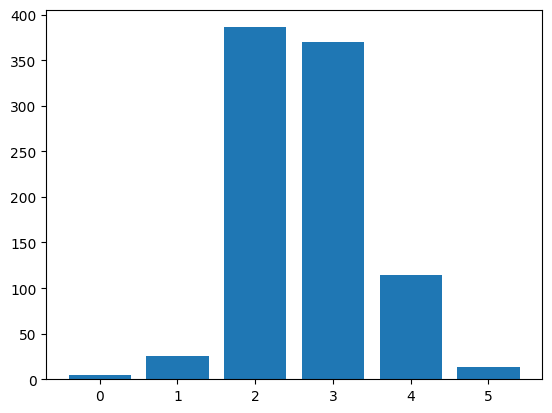

In [65]:
print(X_train.shape,y_train.shape)

# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

if imbalance:
    # transform the dataset
    strategy_over = {3:325, 4:325, 7:325, 8:325}
    # oversample = SMOTE(k_neighbors=4, sampling_strategy=strategy_over)
    oversample = RandomOverSampler(sampling_strategy=strategy_over)
    print(1)
    # X_over, y_over = oversample.fit_resample(X_train, y_train)
    X_train, y_train = oversample.fit_resample(X_train, y_train)
    
    # strategy_under = {5:300, 6:300}
    # undersample = RandomUnderSampler(sampling_strategy=strategy_under)
    # X_train, y_train = undersample.fit_resample(X_over, y_over)

    # summarize distribution
    counter = Counter(y_train)
    for k,v in counter.items():
        per = v / len(y_train) * 100
        print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    # plot the distribution
    plt.bar(counter.keys(), counter.values())
    plt.show()

    print(X_train.shape, y_train.shape)

In [88]:
if eval_model == 'mlp':
    steps = [
        # ('scaler', StandardScaler()),  # Preprocessing step
        ('mlp', MLPClassifier(random_state=1)),  # Estimator step
    ]

    # set nodes and layers iterable for gridsearch
    vals = []
    for i in range(0,30,5):
        for j in range(0,30,5):
            for k in range(0,30,5):
                if i == 0:
                    continue
                elif ((j == 0) and (k != 0)) or ((j == 0) and (k == 0)):
                    val = (i,)
                elif (j != 0) and (k == 0):
                    val =(i, j,)
                else:
                    val = (i, j, k,)
                vals.append(val)
    vals = list(set(vals))

    # Create the pipeline
    pipeline = Pipeline(steps)

    param_grid = {
        'mlp__hidden_layer_sizes': vals,
        'mlp__max_iter': [50, 100],
        'mlp__activation': ['tanh', 'relu', 'logistic'],
        'mlp__solver': ['sgd', 'adam'],
        # 'alpha': [0.0001, 0.05],
        # 'learning_rate': ['constant','adaptive'],
    }

In [89]:
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Set up the GridSearchCV
if do_grid_cv:
    best_cvs = []
    dimsets = ['pca','ica','grp']
    clusters = ['none', 'kmeans', 'gmm']
    for dims in dimsets:
        for clust in clusters:

            steps = [
                ('scaler', StandardScaler()),  # Preprocessing step
                ('mlp', MLPClassifier()),  # Estimator step
            ]

            # Create the pipeline
            pipeline = Pipeline(steps)

            # save_object(reduced_sets, 'reduced_dim_sets_nasa.pkl')
            models_set, X_reduced_set, cluster_sets = load_object('reduced_dim_sets_wine.pkl')

            if dims == 'pca':
            
                pca = PCA(n_components=9, random_state=1, svd_solver='full')
                X_train = pca.fit_transform(X_tr_scaled)
                X_test = pca.transform(X_te_scaled)

                if clust == 'kmeans':
                    kmeans = KMeans(n_clusters=2, random_state=1)
                    C_train = kmeans.fit_predict(X_tr_scaled)
                    C_test = kmeans.predict(X_te_scaled)
                    X_train_cluster = np.concatenate((X_train, C_train.reshape(-1,1)), axis=1)
                    X_test_cluster = np.concatenate((X_test, C_test.reshape(-1,1)), axis=1)

                elif clust == 'gmm':
                    gmm = GaussianMixture(n_components=4, random_state=1)
                    C_train = gmm.fit_predict(X_tr_scaled)
                    C_test = gmm.predict(X_te_scaled)
                    X_train_cluster = np.concatenate((X_train, C_train.reshape(-1,1)), axis=1)
                    X_test_cluster = np.concatenate((X_test, C_test.reshape(-1,1)), axis=1)

            elif dims == 'ica':

                ica = FastICA(n_components=8, random_state=1)
                X_train = ica.fit_transform(X_tr_scaled)
                X_test = ica.transform(X_te_scaled)

                if clust == 'kmeans':
                    kmeans = KMeans(n_clusters=2, random_state=1)
                    C_train = kmeans.fit_predict(X_tr_scaled)
                    C_test = kmeans.predict(X_te_scaled)
                    X_train_cluster = np.concatenate((X_train, C_train.reshape(-1,1)), axis=1)
                    X_test_cluster = np.concatenate((X_test, C_test.reshape(-1,1)), axis=1)

                elif clust == 'gmm':
                    gmm = GaussianMixture(n_components=4, random_state=1)
                    C_train = gmm.fit_predict(X_tr_scaled)
                    C_test = gmm.predict(X_te_scaled)
                    X_train_cluster = np.concatenate((X_train, C_train.reshape(-1,1)), axis=1)
                    X_test_cluster = np.concatenate((X_test, C_test.reshape(-1,1)), axis=1)

            elif dims == 'grp':
                
                grp = GaussianRandomProjection(n_components=9, random_state=1)
                X_train = grp.fit_transform(X_tr_scaled)
                X_test = grp.transform(X_te_scaled)

                if clust == 'kmeans':
                    kmeans = KMeans(n_clusters=2, random_state=1)
                    C_train = kmeans.fit_predict(X_tr_scaled)
                    C_test = kmeans.predict(X_te_scaled)
                    X_train_cluster = np.concatenate((X_train, C_train.reshape(-1,1)), axis=1)
                    X_test_cluster = np.concatenate((X_test, C_test.reshape(-1,1)), axis=1)

                elif clust == 'gmm':
                    gmm = GaussianMixture(n_components=4, random_state=1)
                    C_train = gmm.fit_predict(X_tr_scaled)
                    C_test = gmm.predict(X_te_scaled)
                    X_train_cluster = np.concatenate((X_train, C_train.reshape(-1,1)), axis=1)
                    X_test_cluster = np.concatenate((X_test, C_test.reshape(-1,1)), axis=1)


            print(dims, clust)
            cv = GridSearchCV(pipeline, param_grid, cv=5, verbose=10) 

            if clust == 'none':
                # Fit the model with GridSearchCV to find the best parameters
                cv.fit(X_train, y_train)

                # Best parameters found
                print("Best parameters found: ", cv.best_params_, cv.best_score_)

                # Train the model with the best parameters on the full training data
                best_pipeline = cv.best_estimator_
                best_pipeline.fit(X_train, y_train)

                # Accuracy score
                scores = best_pipeline.score(X_test,y_test)
                print(scores)
                ut.final_classifier_evaluation(best_pipeline, X_train, X_test, y_train, y_test, data=path)

                best_cvs.append(cv)

            elif (clust == 'kmeans') or (clust == 'gmm'):
                # Fit the model with GridSearchCV to find the best parameters
                cv.fit(X_train_cluster, y_train)

                # Best parameters found
                print("Best parameters found: ", cv.best_params_, cv.best_score_)

                # Train the model with the best parameters on the full training data
                best_pipeline = cv.best_estimator_
                best_pipeline.fit(X_train_cluster, y_train)

                # Accuracy score
                scores = best_pipeline.score(X_test_cluster,y_test)
                print(scores)
                ut.final_classifier_evaluation(best_pipeline, X_train_cluster, X_test_cluster, y_train, y_test, data=path)

                best_cvs.append(cv)

else:
    best_pipeline = pipeline

    dimred = None #'rpr'
    cluster = None #'gmm'

    if (eval_model == 'mlp') and (dimred == 'pca') and (cluster == None) and ('wine' in path):
        best_pipeline.set_params(mlp__activation='relu', mlp__hidden_layer_sizes=(25, 5, 20), mlp__max_iter= 100)

    elif (eval_model == 'mlp') and (dimred == 'ica') and (cluster == None) and ('wine' in path):
        best_pipeline.set_params(mlp__activation='relu', mlp__hidden_layer_sizes=(15, 20, 25), mlp__max_iter= 50)

    elif (eval_model == 'mlp') and (dimred == 'rpr') and (cluster == None) and ('wine' in path):
        best_pipeline.set_params(mlp__activation='tanh', mlp__hidden_layer_sizes=(20, 25, 15), mlp__max_iter= 100)

    elif (eval_model == 'mlp') and (dimred == 'pca') and (cluster == 'kmeans') and ('wine' in path):
        best_pipeline.set_params(mlp__activation='tanh', mlp__hidden_layer_sizes=(25, 10, 10), mlp__max_iter= 100)

    elif (eval_model == 'mlp') and (dimred == 'ica') and (cluster == 'kmeans') and ('wine' in path):
        best_pipeline.set_params(mlp__activation='tanh', mlp__hidden_layer_sizes=(5, 15, 15), mlp__max_iter= 100)

    elif (eval_model == 'mlp') and (dimred == 'rpr') and (cluster == 'kmeans') and ('wine' in path):
        best_pipeline.set_params(mlp__activation='relu', mlp__hidden_layer_sizes=(20, 25, 15), mlp__max_iter= 100)

    elif (eval_model == 'mlp') and (dimred == 'pca') and (cluster == 'gmm') and ('wine' in path):
        best_pipeline.set_params(mlp__activation='relu', mlp__hidden_layer_sizes=(15, 15, 25), mlp__max_iter= 100)

    elif (eval_model == 'mlp') and (dimred == 'ica') and (cluster == 'gmm') and ('wine' in path):
        best_pipeline.set_params(mlp__activation='relu', mlp__hidden_layer_sizes=(15, 25, 20), mlp__max_iter= 100)

    elif (eval_model == 'mlp') and (dimred == 'rpr') and (cluster == 'gmm') and ('wine' in path):
        best_pipeline.set_params(mlp__activation='tanh', mlp__hidden_layer_sizes=(25, 25, 15), mlp__max_iter= 100)

    elif (eval_model == 'mlp') and (dimred == None) and (cluster == None) and ('wine' in path):
        best_pipeline.set_params(mlp__activation='tanh', mlp__hidden_layer_sizes=(5, 20, 20), mlp__max_iter= 100)
   

    print('known',best_pipeline.get_params)
    
    if cluster == None:

        ut.final_classifier_evaluation(best_pipeline, X_train, X_test, y_train, y_test, data=path)

    elif (cluster == 'kmeans') or (cluster == 'gmm'):

        ut.final_classifier_evaluation(best_pipeline, X_train_cluster, X_test_cluster, y_train, y_test, data=path)

known <bound method Pipeline.get_params of Pipeline(steps=[('mlp',
                 MLPClassifier(activation='tanh',
                               hidden_layer_sizes=(5, 20, 20), max_iter=100,
                               random_state=1))])>
Model Training Time (s) 0.5271050930023193
Model Prediction Time (s): 0.0008187294006347656
Accuracy: 0.6244541484716157
Precision: 0.5875368136740213
Recall: 0.6244541484716157
F1-Score: 0.6038723349601849
Manual F1 Score: 0.6054332286917674


c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


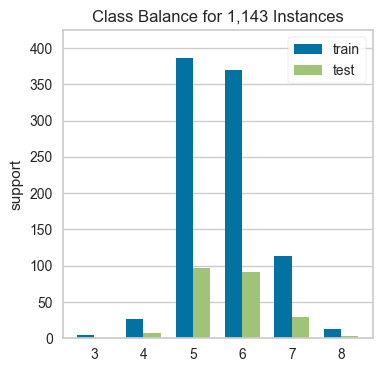

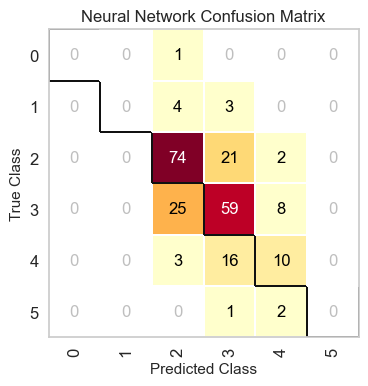

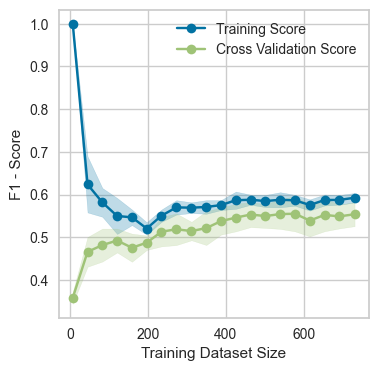

In [90]:
# post-processing/visualizations 

# dataset imbalance
from yellowbrick.target import ClassBalance
fig, ax = plt.subplots(figsize=(4,4))
if "wine"  in path: 
    visualizer = ClassBalance(labels=["3","4","5","6","7","8"], ax=ax) 
elif 'nasa' in path:
    visualizer = ClassBalance(labels=["Safe", "Hazard"], ax=ax) 

visualizer.fit(y_train, y_test) # Fit the data to the visualizer
visualizer.show()               # Finalize and render the figure    

# confusion matrix
from yellowbrick.classifier import ConfusionMatrix
fig, ax = plt.subplots(figsize=(4,4),)
if "wine" in path:
    cm = ConfusionMatrix(best_pipeline, ax=ax) 
elif "nasa" in path:
    cm = ConfusionMatrix(best_pipeline, classes=['Safe','Hazard'], ax=ax) # classes=['Safe','Hazard']

if cluster == None:
    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)

elif (cluster == 'kmeans') or (cluster == 'gmm'):
    cm.fit(X_train_cluster, y_train)
    cm.score(X_test_cluster, y_test)

# cm.ax.set_title("KNeighborsClassifier Confusion Matrix")
cm.ax.set_title("Neural Network Confusion Matrix")
cm.ax.set_xlabel("Predicted Class")
cm.ax.set_ylabel("True Class")
plt.show()

# learning curve (knn, svc, mlp)
from yellowbrick.model_selection import LearningCurve
fig, ax = plt.subplots(figsize=(4,4),)
viz = LearningCurve(pipeline, scoring='f1_weighted', cv=5, shuffle=True, n_jobs=-1, train_sizes=np.linspace(0.01,1.0,20), ax=ax)


if cluster == None:
    # viz.fit(X_train, y_train)
    viz.fit(X_tr_scaled, y_train)

elif (cluster == 'kmeans') or (cluster == 'gmm'):
    viz.fit(X_train_cluster, y_train)

viz.ax.set_ylabel("F1 - Score")
viz.ax.set_xlabel("Training Dataset Size")
viz.ax.set_title(label=None)
plt.legend()
plt.show()

# # percision recall trade-off plot
# from yellowbrick.classifier import PrecisionRecallCurve
# viz = PrecisionRecallCurve(
#     best_pipeline,
#     per_class=True,
#     cmap="Set1"
# )
# viz.fit(X_train, y_train)
# viz.score(X_test, y_test)
# viz.show()

# from yellowbrick.classifier import ROCAUC
# roc_viz = ROCAUC(best_pipeline)
# roc_viz.fit(X_train, y_train)
# roc_viz.score(X_test, y_test)
# roc_viz.show()


pca None


c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, whi

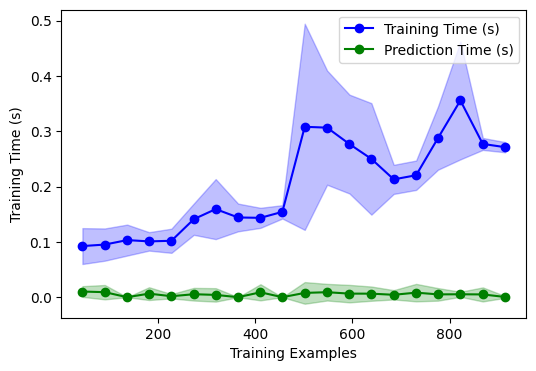

c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, whi

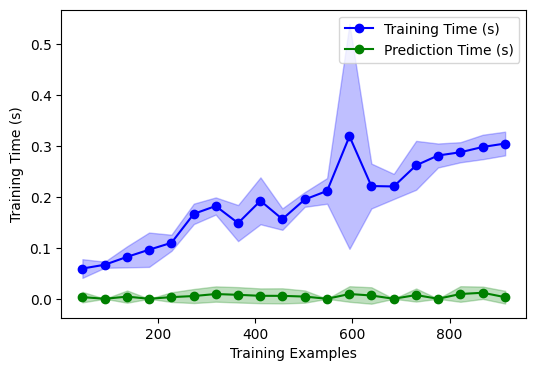

c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, whi

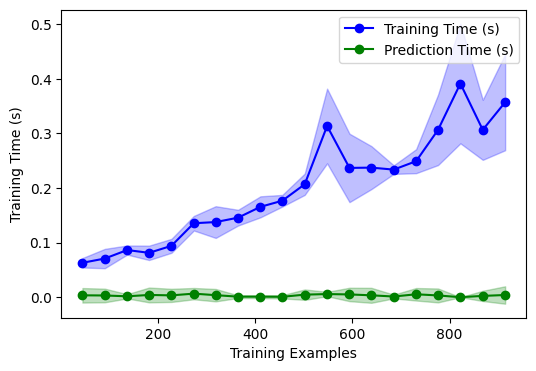

c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, whi

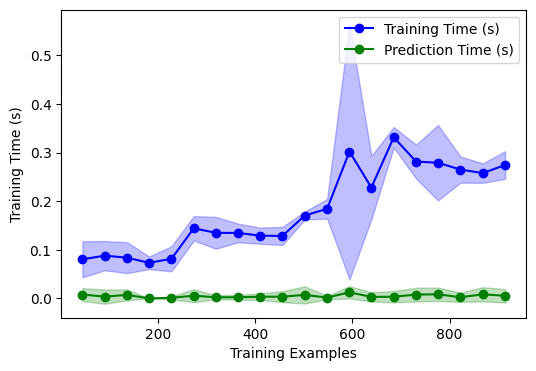

pca None


c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, whi

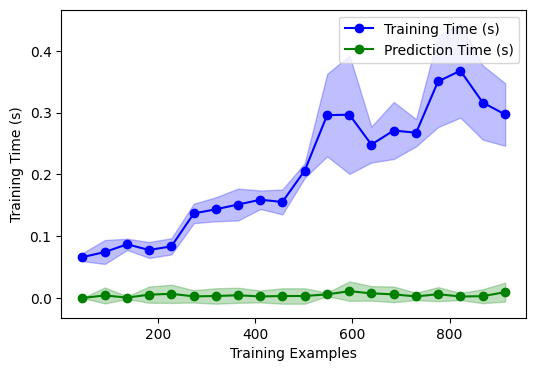

c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, whi

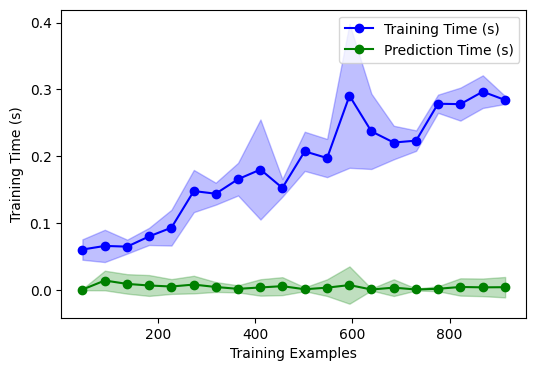

c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, whi

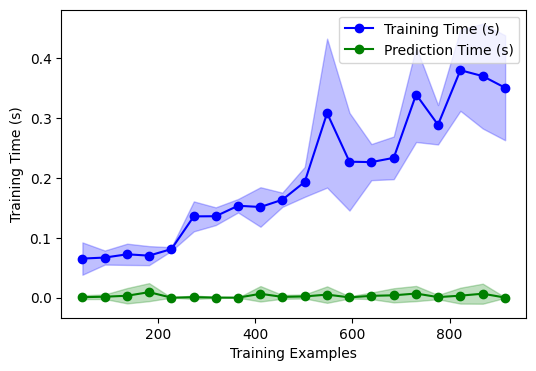

c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, whi

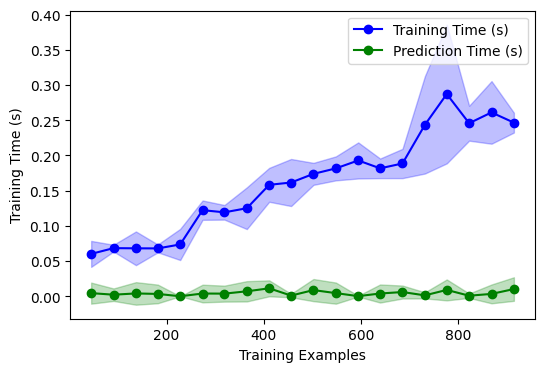

c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, whi

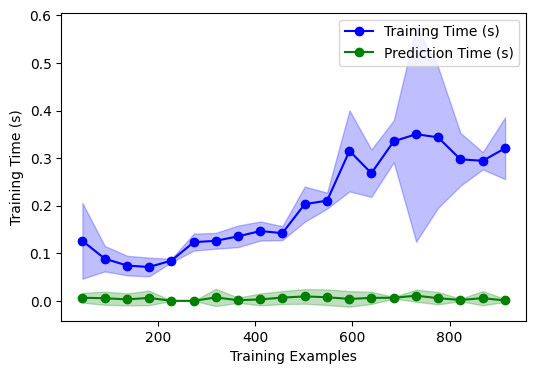

c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, whi

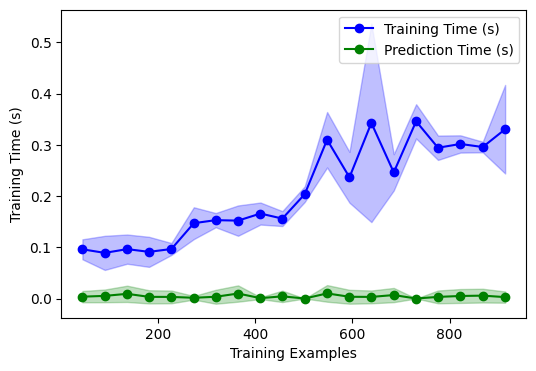

c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, whi

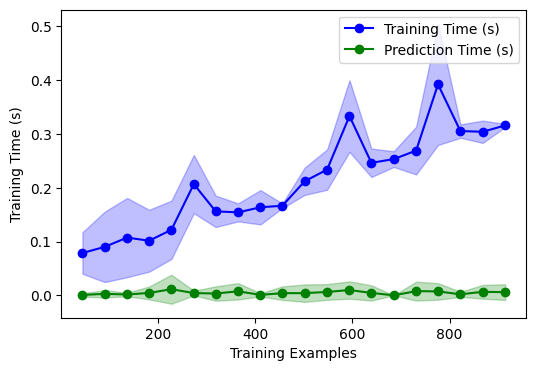

c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\odend\anaconda3\envs\cs7641_a3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, whi

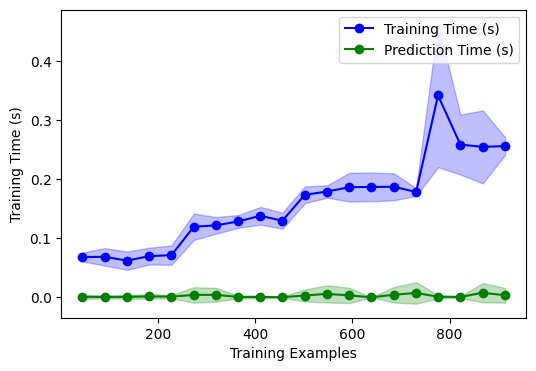

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset, InsetPosition
from matplotlib.patches import Rectangle

# combine time plots (manually set best parameters for each algorithm)
if time_complexity:
    models = ['pca','pca','grp']
    clusters = [None, 'kmeans', 'gmm', 'mlp']
    model_times = []

    for model in models:
        times = []
        for cluster in clusters:
            steps = [
                ('scaler', StandardScaler()),  # Preprocessing step
                ('mlp', MLPClassifier()),  # Estimator step
            ]
            # Create the pipeline
            best_pipeline = Pipeline(steps)


            if model == 'pca':
                if cluster == None:
                    print(model, cluster)
                    X_train, X_test, X_train_cluster, X_test_cluster = load_train_data(model, 'kmeans')
                    feature_list = ['Component'+str(i+1) for i in range(X_train.shape[-1])]
                    X_train_df = pd.DataFrame(X_train, columns=feature_list)
                    best_pipeline.set_params(mlp__activation='relu', mlp__hidden_layer_sizes=(25, 5, 20), mlp__max_iter= 100)
                    train_sizes, fit_mean, pred_mean, fit_std, pred_std = ut.plot_time_curve(best_pipeline, X_train_df, y_train)
                elif cluster == 'kmeans':
                    X_train, X_test, X_train_cluster, X_test_cluster = load_train_data(model, cluster)
                    feature_list = ['Component'+str(i+1) for i in range(X_train.shape[-1])] + ['Cluster']
                    X_train_df = pd.DataFrame(X_train_cluster, columns=feature_list)
                    best_pipeline.set_params(mlp__activation='tanh', mlp__hidden_layer_sizes=(25, 10, 10), mlp__max_iter= 100)
                    train_sizes, fit_mean, pred_mean, fit_std, pred_std = ut.plot_time_curve(best_pipeline, X_train_df, y_train)
                elif cluster == 'gmm':
                    X_train, X_test, X_train_cluster, X_test_cluster = load_train_data(model, cluster)
                    feature_list = ['Component'+str(i+1) for i in range(X_train.shape[-1])] + ['Cluster']
                    X_train_df = pd.DataFrame(X_train_cluster, columns=feature_list)
                    best_pipeline.set_params(mlp__activation='relu', mlp__hidden_layer_sizes=(15, 15, 25), mlp__max_iter= 100)
                    train_sizes, fit_mean, pred_mean, fit_std, pred_std = ut.plot_time_curve(best_pipeline, X_train_df, y_train)
                elif cluster == 'mlp':
                    best_pipeline.set_params(mlp__activation='tanh', mlp__hidden_layer_sizes=(5, 20, 20), mlp__max_iter= 100)
                    train_sizes, fit_mean, pred_mean, fit_std, pred_std = ut.plot_time_curve(best_pipeline, X_train_reg, y_train)


            elif model == 'ica':
                if cluster == None:
                    X_train, X_test, X_train_cluster, X_test_cluster = load_train_data(model, 'kmeans')
                    feature_list = ['Component'+str(i+1) for i in range(X_train.shape[-1])]
                    X_train_df = pd.DataFrame(X_train, columns=feature_list)
                    best_pipeline.set_params(mlp__activation='relu', mlp__hidden_layer_sizes=(15, 20, 25), mlp__max_iter= 50)
                    train_sizes, fit_mean, pred_mean, fit_std, pred_std = ut.plot_time_curve(best_pipeline, X_train_df, y_train)
                elif cluster == 'kmeans':
                    X_train, X_test, X_train_cluster, X_test_cluster = load_train_data(model, cluster)
                    feature_list = ['Component'+str(i+1) for i in range(X_train.shape[-1])] + ['Cluster']
                    X_train_df = pd.DataFrame(X_train_cluster, columns=feature_list)
                    best_pipeline.set_params(mlp__activation='tanh', mlp__hidden_layer_sizes=(5, 15, 15), mlp__max_iter= 100)
                    train_sizes, fit_mean, pred_mean, fit_std, pred_std = ut.plot_time_curve(best_pipeline, X_train_df, y_train)
                elif cluster == 'gmm':
                    X_train, X_test, X_train_cluster, X_test_cluster = load_train_data(model, cluster)
                    feature_list = ['Component'+str(i+1) for i in range(X_train.shape[-1])] + ['Cluster']
                    X_train_df = pd.DataFrame(X_train_cluster, columns=feature_list)
                    best_pipeline.set_params(mlp__activation='relu', mlp__hidden_layer_sizes=(15, 25, 20), mlp__max_iter= 100)
                    train_sizes, fit_mean, pred_mean, fit_std, pred_std = ut.plot_time_curve(best_pipeline, X_train_df, y_train)
                elif cluster == 'mlp':
                    best_pipeline.set_params(mlp__activation='tanh', mlp__hidden_layer_sizes=(5, 20, 20), mlp__max_iter= 100)
                    train_sizes, fit_mean, pred_mean, fit_std, pred_std = ut.plot_time_curve(best_pipeline, X_train_reg, y_train)


            elif model == 'grp':
                if cluster == None:
                    X_train, X_test, X_train_cluster, X_test_cluster = load_train_data(model, 'kmeans')
                    feature_list = ['Component'+str(i+1) for i in range(X_train.shape[-1])]
                    X_train_df = pd.DataFrame(X_train, columns=feature_list)
                    best_pipeline.set_params(mlp__activation='tanh', mlp__hidden_layer_sizes=(20, 25, 15), mlp__max_iter= 100)
                    train_sizes, fit_mean, pred_mean, fit_std, pred_std = ut.plot_time_curve(best_pipeline, X_train_df, y_train)
                elif cluster == 'kmeans':
                    X_train, X_test, X_train_cluster, X_test_cluster = load_train_data(model, cluster)
                    feature_list = ['Component'+str(i+1) for i in range(X_train.shape[-1])] + ['Cluster']
                    X_train_df = pd.DataFrame(X_train_cluster, columns=feature_list)
                    best_pipeline.set_params(mlp__activation='relu', mlp__hidden_layer_sizes=(20, 25, 15), mlp__max_iter= 100)
                    train_sizes, fit_mean, pred_mean, fit_std, pred_std = ut.plot_time_curve(best_pipeline, X_train_df, y_train)
                elif cluster == 'gmm':
                    X_train, X_test, X_train_cluster, X_test_cluster = load_train_data(model, cluster)
                    feature_list = ['Component'+str(i+1) for i in range(X_train.shape[-1])] + ['Cluster']
                    X_train_df = pd.DataFrame(X_train_cluster, columns=feature_list)
                    best_pipeline.set_params(mlp__activation='tanh', mlp__hidden_layer_sizes=(25, 25, 15), mlp__max_iter= 100)
                    train_sizes, fit_mean, pred_mean, fit_std, pred_std = ut.plot_time_curve(best_pipeline, X_train_df, y_train)
                elif cluster == 'mlp':
                    best_pipeline.set_params(mlp__activation='tanh', mlp__hidden_layer_sizes=(5, 20, 20), mlp__max_iter= 100)
                    train_sizes, fit_mean, pred_mean, fit_std, pred_std = ut.plot_time_curve(best_pipeline, X_train_reg, y_train)
    

            times.append([fit_mean, pred_mean, fit_std, pred_std])
        model_times.append(times)

    
# Extract total number of data points and create equally spaced size chunks
num_points = y.shape[0]
train_sizes = (num_points * np.linspace(.05, 1.0, 20)).astype('int')


C:\Users\odend\AppData\Local\Temp\ipykernel_25924\773684646.py:58: MatplotlibDeprecationWarning: The InsetPosition class was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use Axes.inset_axes instead.
  ip = InsetPosition(ax, [1.1,0.2,0.1,0.5])


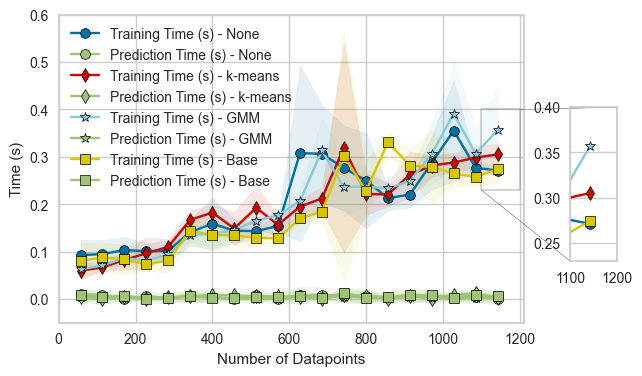

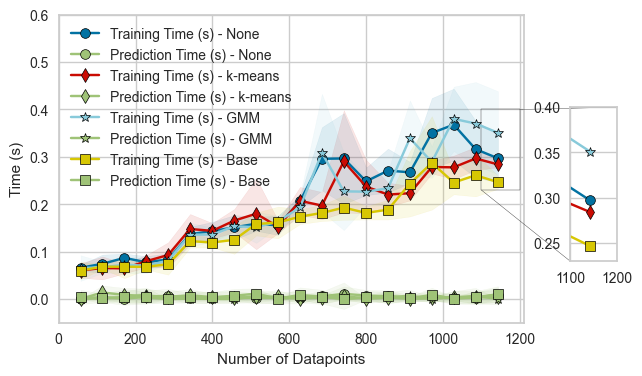

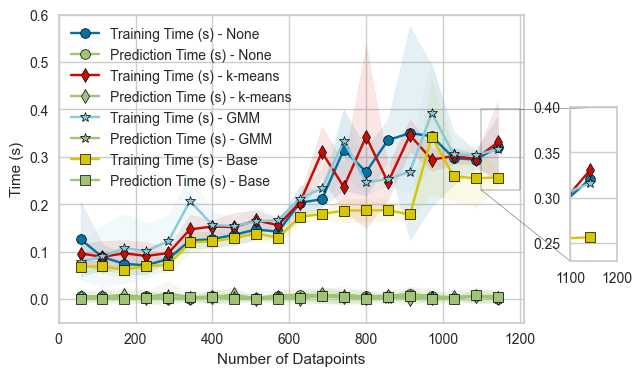

In [108]:

for i in range(3):
    
    times = model_times[i]
    # Create the main plot
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(train_sizes, times[0][0], '-o', color='C0', markeredgecolor='black', markeredgewidth=0.5, label='Training Time (s) - None')
    ax.plot(train_sizes, times[0][1], '-o', color='C1', markeredgecolor='black', markeredgewidth=0.5, label='Prediction Time (s) - None')
    ax.fill_between(train_sizes, times[0][0] - 2 * times[0][2], times[0][0] + 2 * times[0][2], alpha=0.1, color="C0")
    ax.fill_between(train_sizes, times[0][1] - 2 * times[0][3], times[0][1] + 2 * times[0][3], alpha=0.1, color="C1")

    ax.plot(train_sizes, times[1][0], '-d', color='C2', markeredgecolor='black', markeredgewidth=0.5, label='Training Time (s) - k-means')
    ax.plot(train_sizes, times[1][1], '-d', color='C1', markeredgecolor='black', markeredgewidth=0.5, label='Prediction Time (s) - k-means')
    ax.fill_between(train_sizes, times[1][0] - 2 * times[1][2], times[1][0] + 2 * times[1][2], alpha=0.1, color="C2")
    ax.fill_between(train_sizes, times[1][1] - 2 * times[1][3], times[1][1] + 2 * times[1][3], alpha=0.1, color="C1")

    ax.plot(train_sizes, times[2][0], '-*', color='C5', markeredgecolor='black', markeredgewidth=0.5, label='Training Time (s) - GMM')
    ax.plot(train_sizes, times[2][1], '-*', color='C1', markeredgecolor='black', markeredgewidth=0.5, label='Prediction Time (s) - GMM')
    ax.fill_between(train_sizes, times[2][0] - 2 * times[2][2], times[2][0] + 2 * times[2][2], alpha=0.1, color="C5")
    ax.fill_between(train_sizes, times[2][1] - 2 * times[2][3], times[2][1] + 2 * times[2][3], alpha=0.1, color="C1")

    ax.plot(train_sizes, times[3][0], '-s', color='C4', markeredgecolor='black', markeredgewidth=0.5, label='Training Time (s) - Base')
    ax.plot(train_sizes, times[3][1], '-s', color='C1', markeredgecolor='black', markeredgewidth=0.5, label='Prediction Time (s) - Base')
    ax.fill_between(train_sizes, times[3][0] - 2 * times[3][2], times[3][0] + 2 * times[3][2], alpha=0.1, color="C4")
    ax.fill_between(train_sizes, times[3][1] - 2 * times[3][3], times[3][1] + 2 * times[3][3], alpha=0.1, color="C1")



    if 'wine' in path:
        ax.set_xlim([0, 1210])
        ax.set_ylim([-0.05, 0.6])
    else:
        ax.set_xlim([0, 4900])
        ax.set_ylim([-0.1, 2.1])

    ax.set_xlabel('Number of Datapoints')
    ax.set_ylabel('Time (s)')
    ax.legend(loc='upper left')

    # Create an inset plot
    axins = inset_axes(ax, width="30%", height="30%", loc='upper right')
    axins.plot(train_sizes, times[0][0], '-o', color='C0', markeredgecolor='black', markeredgewidth=0.5)
    axins.plot(train_sizes, times[0][1], '-o', color='C1', markeredgecolor='black', markeredgewidth=0.5)
    axins.plot(train_sizes, times[1][0], '-d', color='C2', markeredgecolor='black', markeredgewidth=0.5)
    axins.plot(train_sizes, times[1][1], '-d', color='C1', markeredgecolor='black', markeredgewidth=0.5)
    axins.plot(train_sizes, times[2][0], '-*', color='C5', markeredgecolor='black', markeredgewidth=0.5)
    axins.plot(train_sizes, times[2][1], '-*', color='C1', markeredgecolor='black', markeredgewidth=0.5)
    axins.plot(train_sizes, times[3][0], '-s', color='C4', markeredgecolor='black', markeredgewidth=0.5)
    axins.plot(train_sizes, times[3][1], '-s', color='C1', markeredgecolor='black', markeredgewidth=0.5)

    # Zoom in to the specified area in the inset
    if 'wine' in path:
        axins.set_xlim(1100, 1200)
        axins.set_ylim(0.23, 0.40)
    else:
        axins.set_xlim(4600, 4800)
        axins.set_ylim(-0.01, 0.22)

    ip = InsetPosition(ax, [1.1,0.2,0.1,0.5])
    axins.set_axes_locator(ip)

    # Draw connecting lines between the rectangle and the inset plot
    mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec="0.2")
    plt.show()

In [60]:
times[3][0][-1]

0.25635085105895994